# Yêu cầu 2

## Đọc dữ liệu đầu vào

In [2]:
import pandas as pd

In [3]:
path = "/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/cleaned_data/df_revenue_clean.csv"
data_clean = pd.read_csv(path)

data_clean.head(5)

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_87252/1067882759.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_clean = pd.read_csv(path)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12


## Doanh thu

### Daily


Thời gian bắt đầu: 2010-12-01 08:26:00
Thời gian kết thúc: 2011-12-09 12:50:00

Daily Revenue (Head):
InvoiceDate
2010-12-01    58776.79
2010-12-02    47629.42
2010-12-03    46898.63
2010-12-04        0.00
2010-12-05    31364.63
Freq: D, Name: TotalAmount, dtype: float64


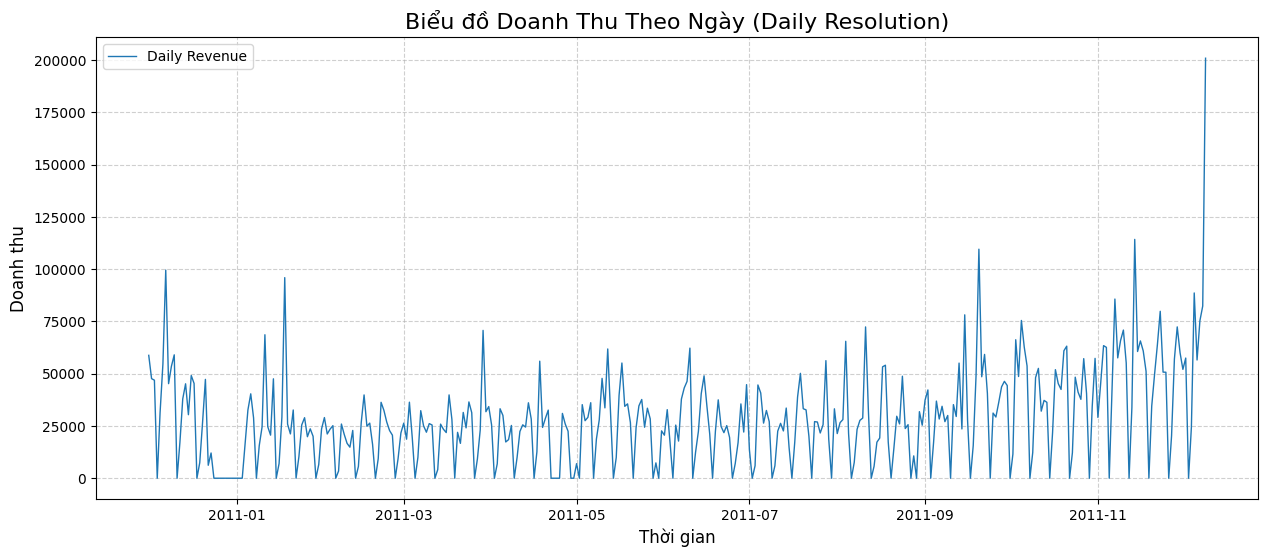

In [4]:
# Chuyển đổi cột InvoiceDate sang định dạng datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# Kiểm tra khoảng thời gian của dữ liệu
print(f"Thời gian bắt đầu: {data_clean['InvoiceDate'].min()}")
print(f"Thời gian kết thúc: {data_clean['InvoiceDate'].max()}")

# 1. Xây dựng chuỗi thời gian theo ngày (Daily)
# Resample theo ngày ('D') và tính tổng doanh thu
daily_revenue = data_clean.set_index('InvoiceDate').resample('D')['TotalAmount'].sum()

# Hiển thị 5 dòng đầu
print("\nDaily Revenue (Head):")
print(daily_revenue.head())

# Trực quan hóa Daily Revenue
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(daily_revenue.index, daily_revenue.values, label='Daily Revenue', color='#1f77b4', linewidth=1)
plt.title('Biểu đồ Doanh Thu Theo Ngày (Daily Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Monthly

Monthly Revenue:
InvoiceDate
2010-12-31     821452.730
2011-01-31     689811.610
2011-02-28     522545.560
2011-03-31     716215.260
2011-04-30     536968.491
2011-05-31     769296.610
2011-06-30     760547.010
2011-07-31     718076.121
2011-08-31     757841.380
2011-09-30    1056435.192
2011-10-31    1151263.730
2011-11-30    1503866.780
2011-12-31     637790.330
Freq: ME, Name: TotalAmount, dtype: float64


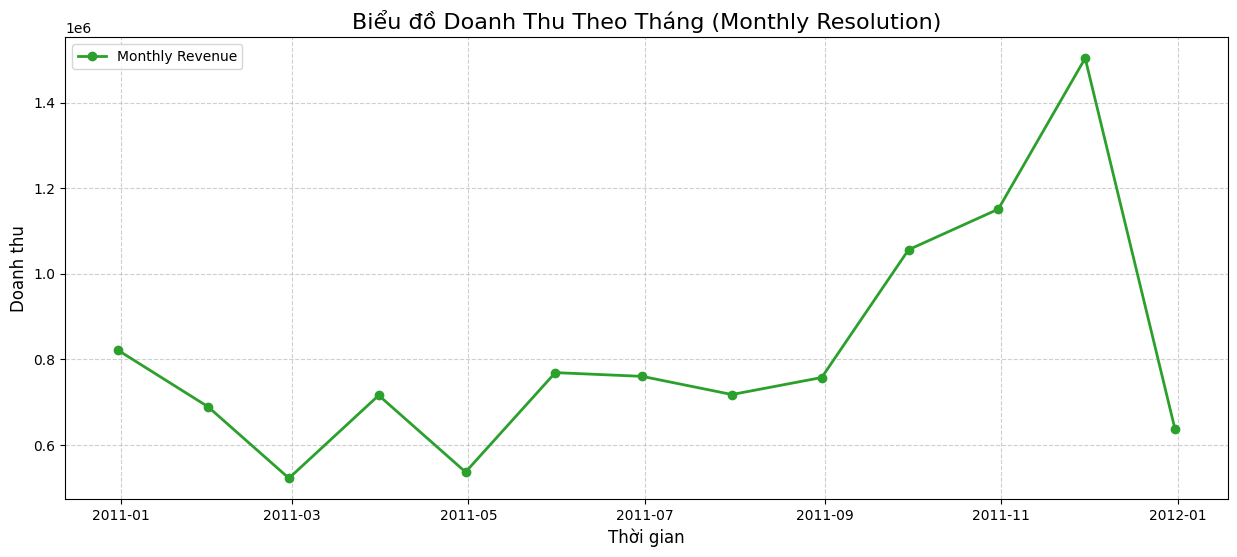

In [5]:
# 2. Xây dựng chuỗi thời gian theo tháng (Monthly)
# Resample theo tháng ('ME' - Month End) và tính tổng doanh thu
monthly_revenue = data_clean.set_index('InvoiceDate').resample('ME')['TotalAmount'].sum()

# Hiển thị dữ liệu
print("Monthly Revenue:")
print(monthly_revenue)

# Trực quan hóa Monthly Revenue
plt.figure(figsize=(15, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, label='Monthly Revenue', color='#2ca02c', marker='o', linewidth=2)
plt.title('Biểu đồ Doanh Thu Theo Tháng (Monthly Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Lập luận lựa chọn độ phân giải (Resolution Selection)

**1. Daily Resolution (Độ phân giải theo ngày):**
*   **Đặc điểm:** Dữ liệu biến động mạnh, nhiều nhiễu (noise).
*   **Mục đích:** Giúp quan sát các biến động ngắn hạn, ảnh hưởng của các sự kiện cụ thể (ví dụ: ngày lễ, khuyến mãi ngắn hạn), và phát hiện các điểm bất thường (outliers) chi tiết.
*   **Hạn chế:** Khó nhìn thấy xu hướng dài hạn do độ nhiễu cao (high frequency fluctuations).

**2. Monthly Resolution (Độ phân giải theo tháng):**
*   **Đặc điểm:** Dữ liệu mượt mà hơn, loại bỏ được các biến động trong tuần (weekly seasonality).
*   **Mục đích:** Phù hợp để phân tích xu hướng dài hạn (Trend) và tính mùa vụ hàng năm (Yearly Seasonality). Đây là độ phân giải tốt cho việc ra quyết định chiến lược ở cấp quản lý.
*   **Hạn chế:** Mất đi thông tin chi tiết về các biến động ngắn hạn.

**Kết luận:**
Để phân tích toàn diện, chúng ta sẽ sử dụng kết hợp cả hai:
*   **Monthly** để xác định Trend và Seasonality chính.
*   **Daily** để đi sâu vào phân tích các biến động bất thường (Irregularity) và chi tiết hành vi trong các dịp đặc biệt.

## Number of Orders

## Số lượng đơn hàng (Number of Orders)

### Daily

Daily Orders (Head):
InvoiceDate
2010-12-01    127
2010-12-02    142
2010-12-03     68
2010-12-04      0
2010-12-05     88
Freq: D, Name: InvoiceNo, dtype: int64


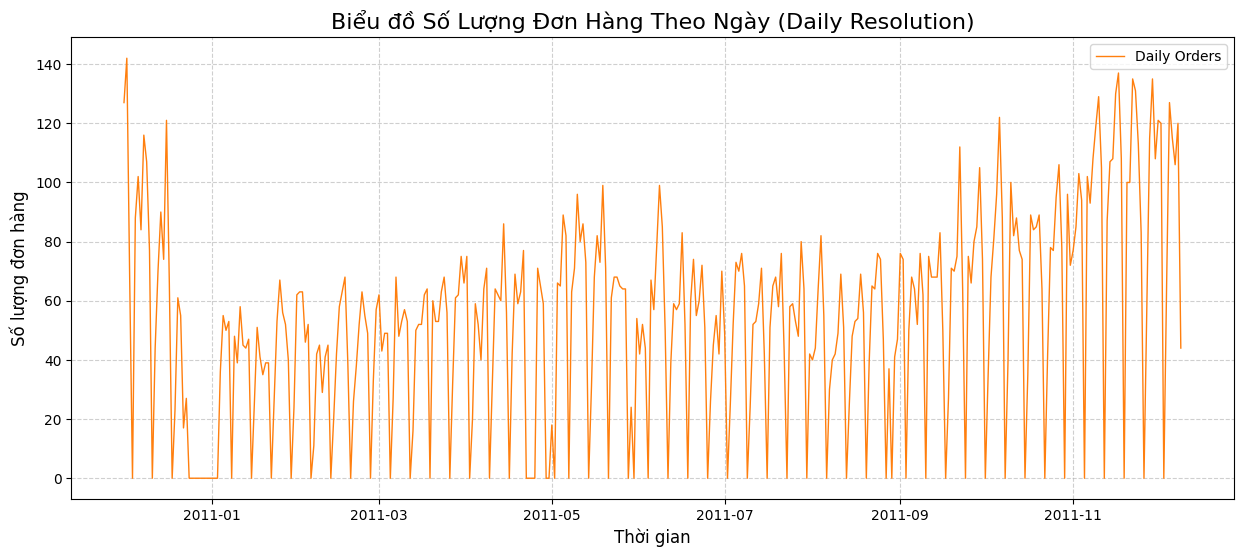

In [6]:
# 1. Xây dựng chuỗi thời gian số lượng đơn hàng theo ngày (Daily)
# Resample theo ngày ('D') và đếm số lượng InvoiceNo duy nhất
daily_orders = data_clean.set_index('InvoiceDate').resample('D')['InvoiceNo'].nunique()

# Hiển thị 5 dòng đầu
print("Daily Orders (Head):")
print(daily_orders.head())

# Trực quan hóa Daily Orders
plt.figure(figsize=(15, 6))
plt.plot(daily_orders.index, daily_orders.values, label='Daily Orders', color='#ff7f0e', linewidth=1)
plt.title('Biểu đồ Số Lượng Đơn Hàng Theo Ngày (Daily Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Monthly

Monthly Orders:
InvoiceDate
2010-12-31    1559
2011-01-31    1086
2011-02-28    1100
2011-03-31    1454
2011-04-30    1246
2011-05-31    1681
2011-06-30    1533
2011-07-31    1476
2011-08-31    1361
2011-09-30    1838
2011-10-31    2040
2011-11-30    2769
2011-12-31     819
Freq: ME, Name: InvoiceNo, dtype: int64


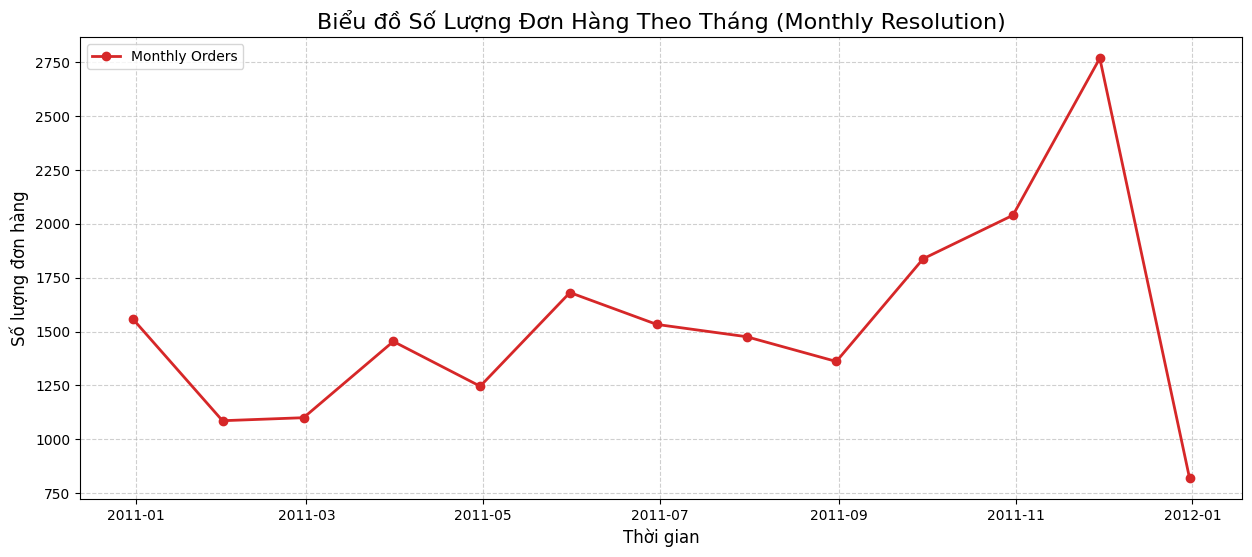

In [7]:
# 2. Xây dựng chuỗi thời gian số lượng đơn hàng theo tháng (Monthly)
# Resample theo tháng ('ME') và đếm số lượng InvoiceNo duy nhất
monthly_orders = data_clean.set_index('InvoiceDate').resample('ME')['InvoiceNo'].nunique()

# Hiển thị dữ liệu
print("Monthly Orders:")
print(monthly_orders)

# Trực quan hóa Monthly Orders
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders.index, monthly_orders.values, label='Monthly Orders', color='#d62728', marker='o', linewidth=2)
plt.title('Biểu đồ Số Lượng Đơn Hàng Theo Tháng (Monthly Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()